# SysML v2 JupyterBook

This Jupyter Notebook is an exploration of SysML v2 from the user perspective. It shows some SysML v2 basics, but mainly focuses on the special features compared to SysML v1 and how they can be used. For a detailed introduction to the textual syntax of SysML v2, I recommend the following PDF: [Introduction to the SysML v2 Language Textual Notation](https://github.com/Systems-Modeling/SysML-v2-Release/blob/master/doc/Intro%20to%20the%20SysML%20v2%20Language.pdf).

**Please note: This is work in progress. You will see sketchy stuff. If you have any comments, contact me: [tim@mbse4u.com](mailto:tim@mbse4u.com).**

## Modeling with SysML v2

### Introduction

This section provides 

* a brief introduction of the structural modeling with SysML v2,
* with a special focus on what is different compared to SysML v1.

It is not (yet) a complete SysML v2 tutorial. It uses the SysML v2 pilot implementation which is not intended as full modeling tool for industrail application. The SysML v2 pilot implementation is developed and used 

### Example and first steps

The simple example system is the following electrical vehicle:

![Electrical HSUV](lego-evehicle.jpg)

Let's start with a logical architecture of the vehicle. A first major difference compared to SysML is that there is a textual syntax for SysML v2.
The following cell shows the textual SysML v2 syntax of the logical architecture. The package statement defines the namespace of our architecture. The architecture itself is a simple hierarchical set of parts.

In [10]:
package eVehicle_LogicalArchitecture {
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2];
        part rearWheel[2];
    }
}

Package eVehicle_LogicalArchitecture (591b961a-c162-4be9-99df-f8c82451be6a)


Run the cell above to create the real model (it is only a textual visualization). Then you can see the model by running the following code. It provides a deep insight into the model structures:

In [11]:
%show eVehicle_LogicalArchitecture

Package eVehicle_LogicalArchitecture (591b961a-c162-4be9-99df-f8c82451be6a)
  [Membership] PartUsage eVehicle (a3fd1d82-407a-4542-8ab2-8a1be2ef9019)
    [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage body (4094b2ed-860b-4bcc-a719-e52cc75abc5b)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage battery (d242560f-e9bb-4c8b-8dec-1f986aaac8e8)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage engine (2854968d-ba43-43a6-a084-5eec69b4cf7a)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage frontAxis (f43fe7ae-45cd-48e9-9865-48b3122161f5)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [FeatureMembership] PartUsage rearAxis (6879ef31-fe69-43fa-b5ca-aced7a62bc14)
      [Subsetting] PartUsage parts (5e706ee2-d20c-4e77-90f3-fda3ba1c3172)
    [

More convenient for the common model user, of course, is the graphical notation presented after the execution of the following cell:

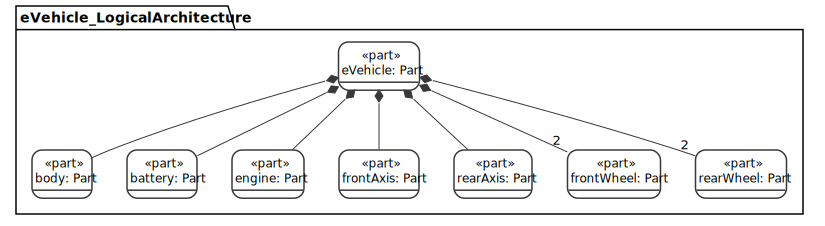

In [12]:
%viz --view=tree eVehicle_LogicalArchitecture

The diagram is only a view, and not an editor. A graphical editor is not provided in the pilot implementation. Future SysML v2 modeling tools will certainly offer graphical editors.

### Changes to SysML v1

SysML v2 is a complete new language with a different foundation than SysML v1. Therefore, there are plenty of differences. Here, we highlight only the changes that are most relevant to the modeler.

If I had modeled the eHSUV in SysML v1, I would have had to first define blocks and then part properties whose types are the blocks.

![eVehicle in SysML v1](evehicle-logical-architecture-sysmlv1.jpg)


### Parts and PartDefinitions

In SysML v2, you can define parts without types. However, you could define types if you like. A type can be used to reuse definitions. I extend our example and add a property to the wheel to specify the size. The type of the attribute is Integer. I skip units for now.

In [13]:
package eVehicle_LogicalArchitecture {
    
    import ScalarValues::Integer;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2] {
            attribute size : Integer;
        }
        part rearWheel[2] {
            attribute size : Integer;
        }
    }
}

Package eVehicle_LogicalArchitecture (8749589e-603e-4b3d-bdff-2219f9f4f758)


Run the cell with the SysML v2 model, and visualize the model. If you also would like to see the model structure, execute the %show command.

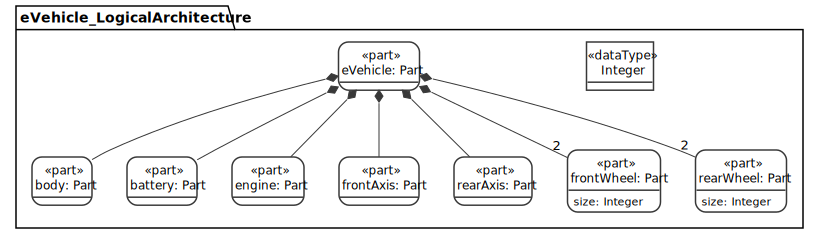

In [14]:
%viz --view=tree eVehicle_LogicalArchitecture

Although it is still very simple, the model already smells of reuse. The size attribute is currently defined twice. Now we define a type repsectively PartDefinition Wheels and specify that as the type of Parts.

In [15]:
package eVehicle_Definitions {

    import ScalarValues::Integer;   
    
    part def Wheel {
        attribute size : Integer;
    }
}

package eVehicle_LogicalArchitecture {

    import eVehicle_Definitions::*;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_Definitions (fb0059e2-6f8f-4072-80f6-cd9fea70d935)
Package eVehicle_LogicalArchitecture (35d47a1a-c6d6-41e5-8d7d-af0e3166e933)


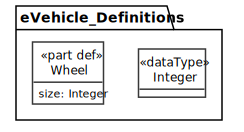

In [7]:
%viz --view=tree eVehicle_Definitions

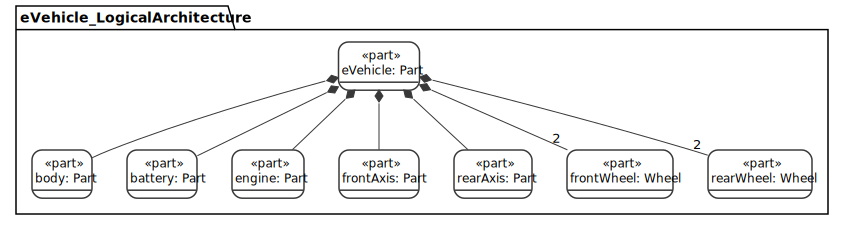

In [16]:
%viz --view=tree eVehicle_LogicalArchitecture

The attribute size itself can also be defined and reused for several attribute usages. It is a common concept in SysML v2 to separate  definition of elements and usage of elements. SysML v1 also follows this concept, but not as consequent as SysML v2. For example, SysML v1 does not provide a separate attribute definition.

The attribute definition is not mandatory and only partly useful in this example, because the size is only used at one place. But I added it anyhow as an example for attribute definitions.

In [17]:
package eVehicle_Definitions {
   
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        attribute size : WheelSize;
    }
}

package eVehicle_LogicalArchitecture {   
    
    import eVehicle_Definitions::*;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_Definitions (5d53396e-ee88-4b9d-9e19-73f30556bcad)
Package eVehicle_LogicalArchitecture (d292fc1f-ee2c-476a-ace1-e3c1c3f05134)


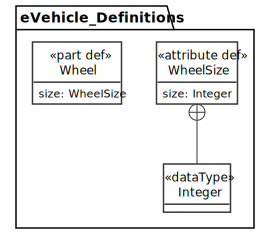

In [19]:
%viz --view=tree eVehicle_Definitions

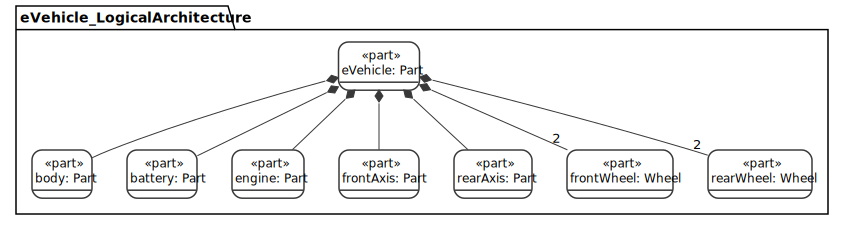

In [18]:
%viz --view=tree eVehicle_LogicalArchitecture

## Putting the parts together

By now the model only defines the breakdown structure of the vehicle. There is no definition yet of how the parts are connected. The next example model *eVehicle_LogicalArchitecture_v5* connects the parts in a meaningful way.


In [22]:
package eVehicle_Definitions {
   
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        attribute size : WheelSize;
    }
}

package eVehicle_LogicalArchitecture {
       
    import eVehicle_Definitions::*;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        connect battery to engine;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_Definitions (35aab867-aa0e-4f40-8d85-cca404061091)
Package eVehicle_LogicalArchitecture (9e468307-bfa1-4260-901a-15d42ece70a4)


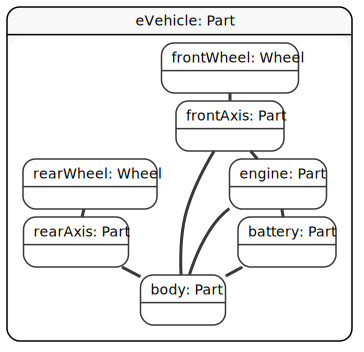

In [23]:
%viz --view=interconnection eVehicle_LogicalArchitecture::eVehicle

## Modeling interfaces

## Modeling variants

## Satisfying requirements

# SysML v2 MBSE Methodologies JupyterBook

This chapter covers the impact of SysML v2 on MBSE methodologies.

Which methods continue to work well and which would need to be adapted? Theoretically, the methodologies have been developed independently of the SysML language, but definitely with a focus on SysML v1.

New features of SysML v2 can also lead to new methods in the methodologies.


## SYSMOD with SysML v2

The example is taken from the book [SYSMOD - The Systems Modeling Toolbox](https://leanpub.com/sysmod).

### System Idea and System Objectives

### System Context

### System Use Cases

### Use Case Activities

### Domain Model

### Quality Requirements

### Logical Architecture 

### Product Architecture

### System States

### Verify Architecture with Scenarios

### Test Cases

### FAS with SysML v2

The example is taken from the tutorial of the FAS plugin for MagicDraw: http://sourceforge.net/projects/fas4md/files/FAS_plugin_tutorial.pdf/download.

In [5]:
package TheFASJukeBox {
    
    package UseCases {
        activity 'Listen to Music';
        activity 'Assemble Music Collection';
        activity 'Retrieve Money';
        activity '(Un)install and Move Jukebox';
        activity 'Uninstall Jukebox';
        activity 'Install Jukebox';
        activity 'Supply Jukebox with Energy';
    }
    
    package FunctionalArchitecture {
        package FunctionalGroups {
            
        }
        
        part TheFASJukeBoxFunctionalContext {
            part TheFASJukeBoxFunctionalArchitecture {
                
            }
        }
        
    }
    
}

Package TheFASJukeBox (7b5c7211-47e3-4007-b34c-e176981952a3)


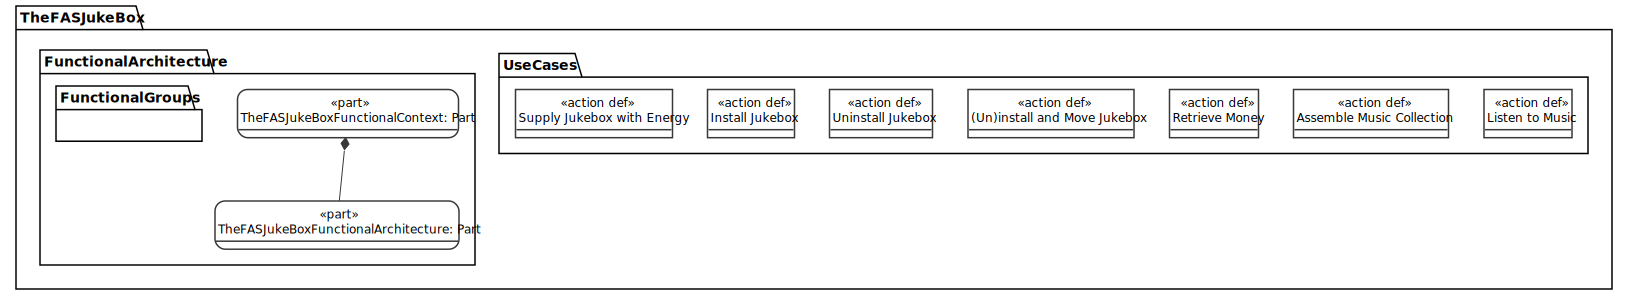

In [6]:
%viz --view=tree TheFASJukeBox